## Compute the azimuth and elevation phase maps

This is an example for how to compute and plot phase maps and from repetetive stimulation
In this examples there were 10 repeats. 

1. Compute the fft of each stimulation
2. To correct for phase delays subtract the phase of stimuli moving in opposite directions
3. Plot stimuli phase as time.

In [2]:
from wfield import *
from scipy.io import loadmat
# load scanbox event log
folder = '/mnt/dual/temp_folder/retinotopy/'
evn = loadmat(pjoin(folder,'xx0_003_003.mj2_events'),squeeze_me=True)['ttl_events']
evt = evn[:,2].astype(int)*255 + evn[:,1]
# load data
U = np.load(pjoin(folder,'U.npy'))
SVT = np.load(pjoin(folder,'SVT.npy'))


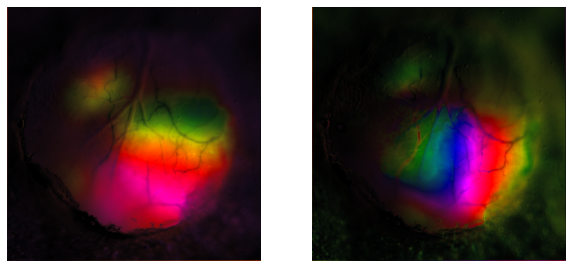

In [10]:
# this computes the average and fft on in SVD space which is insane fast

%matplotlib inline
from tifffile import imsave

component = 10 # nrepeats

avg = []
raw = []
for e,i in enumerate(evt):
    avg.append(np.mean(SVT[:,np.arange(i,i+10*10*10)].reshape([-1,10,100]),axis=1))
    raw.append(SVT[:,np.arange(i,i+10*10*10)])
    imsave('avg_stim_{0}.tif'.format(e),reconstruct(U,avg[-1]))
    
#from scipy.ndimage.filters import gaussian_filter,median_filter
#mov = runpar(median_filter,U.transpose(2,0,1) ,size=5)
#U2 = np.stack(mov).transpose(1,2,0).astype(np.float32)
U2 = U.copy()


fig = plt.figure(figsize=[10,5])
fig.add_subplot(1,2,1)
# this will become a function at some point
a = reconstruct(U2,fft(raw[0].T, axis = 0)[component])
b = reconstruct(U2,fft(raw[1].T, axis = 0)[component])
phase  = -1. * (np.angle(a)-np.angle(b)) % (2*np.pi)
mag = (np.abs(a+b)*2.)

plt.imshow(im_fftphase_hsv([mag,phase]))
plt.axis('off')

fig.add_subplot(1,2,2)

U2 = U.copy()
a = reconstruct(U2,fft(raw[2].T, axis = 0)[component])
b = reconstruct(U2,fft(raw[3].T, axis = 0)[component])
phase1  = -1. * (np.angle(a)-np.angle(b)) % (2*np.pi)
mag = (np.abs(a+b)*2.)

plt.imshow(im_fftphase_hsv([mag,phase1]))
plt.axis('off')
plt.savefig('az_el_unfiltered.pdf')

<IPython.core.display.Javascript object>


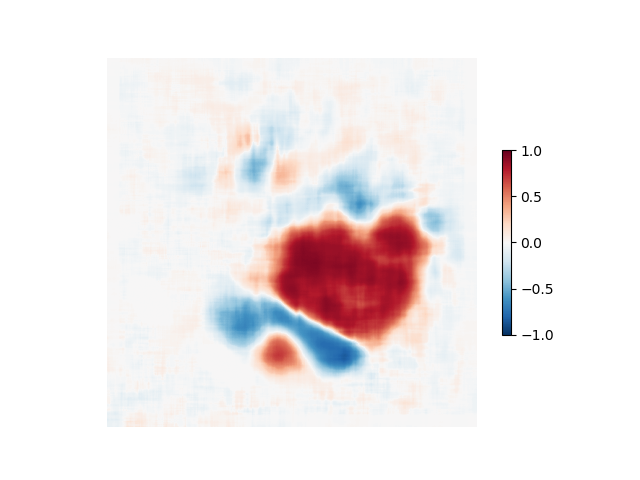

(-0.5, 511.5, 511.5, -0.5)

In [5]:
# Sign maps
from scipy.ndimage.filters import median_filter
plt.figure()
plt.imshow(median_filter(visual_sign_map(phase, phase1),33),
           cmap='RdBu_r',clim = [-1,1])
plt.colorbar(shrink=0.5)
plt.axis('off')
# plt.savefig('phasemap.pdf')

In [ ]:
%matplotlib notebook
nb_play_movie(reconstruct(U2,avg[3]),cmap='inferno',clim=[-0.05,0.05])

In [76]:
#Save the a snapshot 
dat = VideoStack('.')
imsave('orig_im.tif',dat[0])